In [2]:
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_circles

In [4]:
X,y=make_circles(n_samples=1000,noise=0.2,factor=0.1)

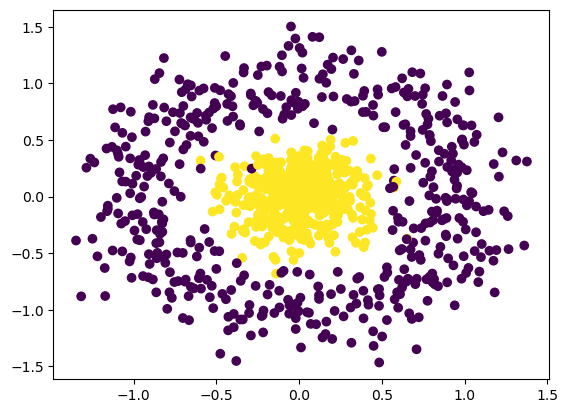

In [5]:
plt.scatter(X[:,0],X[:,1],c=y)

In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [10]:
model=Sequential()
model.add(Dense(256,input_dim=2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               768       
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 1025 (4.00 KB)
Trainable params: 1025 (4.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [13]:
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=1000)

Epoch 1/1000


25/25 [==============================] - 2s 17ms/step - loss: 0.6729 - accuracy: 0.7412 - val_loss: 0.6461 - val_accuracy: 0.6550
Epoch 2/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.6086 - accuracy: 0.7237 - val_loss: 0.5935 - val_accuracy: 0.7550
Epoch 3/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.5528 - accuracy: 0.8487 - val_loss: 0.5394 - val_accuracy: 0.8800
Epoch 4/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.4988 - accuracy: 0.9413 - val_loss: 0.4828 - val_accuracy: 0.9650
Epoch 5/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.4444 - accuracy: 0.9675 - val_loss: 0.4277 - val_accuracy: 0.9750
Epoch 6/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.3890 - accuracy: 0.9787 - val_loss: 0.3700 - val_accuracy: 0.9750
Epoch 7/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.3372 - accuracy: 0.9887 - val_loss: 0.3182 - val_accuracy: 0.9750
Epo

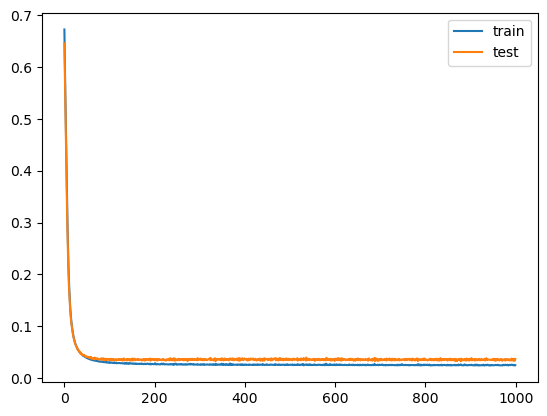

In [14]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend(bbox_to_anchor=(1,1))

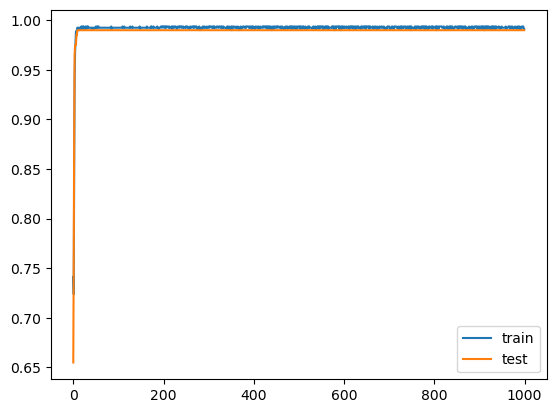

In [16]:
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='test')
plt.legend()

9600/9600 [==============================] - 10s 1ms/step


<Axes: >

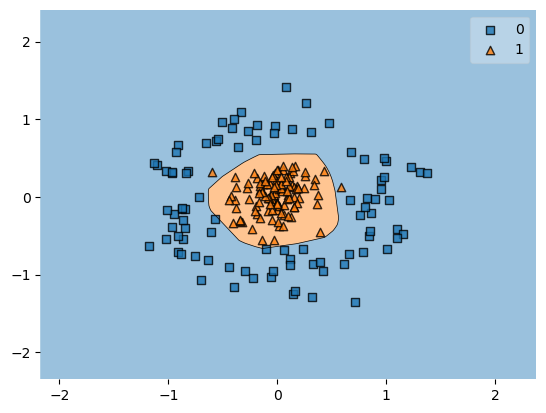

In [18]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_test,y_test.ravel(),clf=model)

9600/9600 [==============================] - 13s 1ms/step


<Axes: >

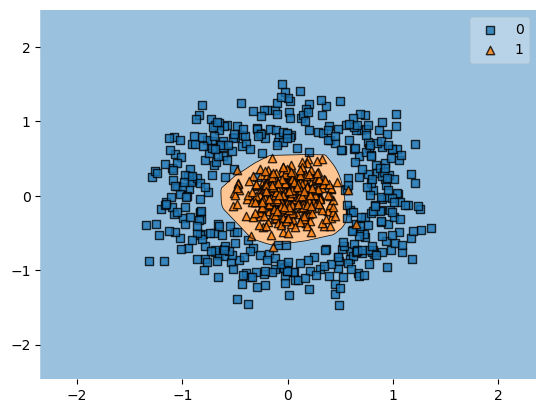

In [19]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train,y_train.ravel(),clf=model)

In [20]:
model=Sequential()
model.add(Dense(256,input_dim=2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 256)               768       
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 1025 (4.00 KB)
Trainable params: 1025 (4.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
cb=EarlyStopping(min_delta=0.001,patience=20)

In [24]:
hist=model.fit(X_train,y_train,validation_data=(X_test,y_test),callbacks=cb,epochs=2000)

Epoch 1/2000
25/25 [==============================] - 0s 4ms/step - loss: 0.0282 - accuracy: 0.9912 - val_loss: 0.0335 - val_accuracy: 0.9900
Epoch 2/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0282 - accuracy: 0.9937 - val_loss: 0.0351 - val_accuracy: 0.9900
Epoch 3/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0294 - accuracy: 0.9925 - val_loss: 0.0373 - val_accuracy: 0.9900
Epoch 4/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0283 - accuracy: 0.9925 - val_loss: 0.0328 - val_accuracy: 0.9900
Epoch 5/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0283 - accuracy: 0.9937 - val_loss: 0.0346 - val_accuracy: 0.9900
Epoch 6/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0283 - accuracy: 0.9925 - val_loss: 0.0366 - val_accuracy: 0.9900
Epoch 7/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0281 - accuracy: 0.9925 - val_loss: 0.0334 - val_accuracy: 0.9900
Epoch 

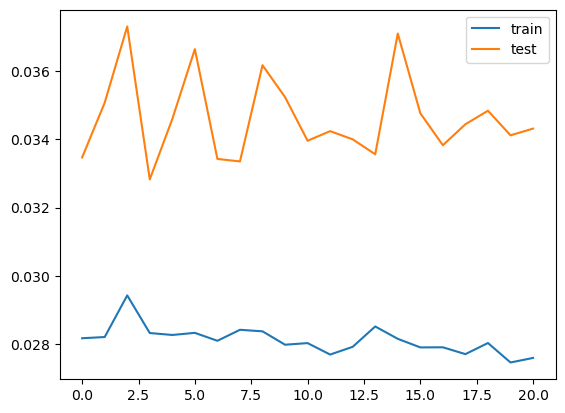

In [28]:
plt.plot(hist.history['loss'],label='train')
plt.plot(hist.history['val_loss'],label='test')
plt.legend()

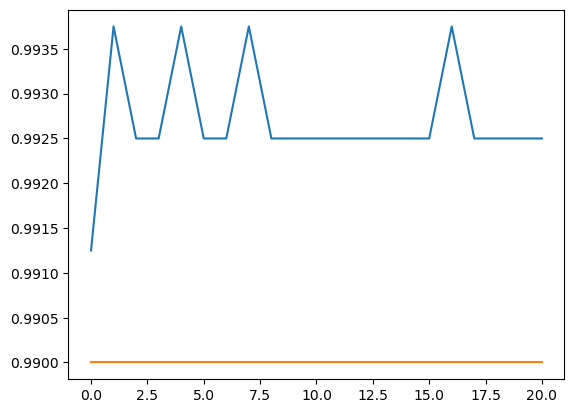

In [30]:
plt.plot(hist.history['accuracy'],label='train')
plt.plot(hist.history['val_accuracy'],label='test')

9600/9600 [==============================] - 11s 1ms/step


<Axes: >

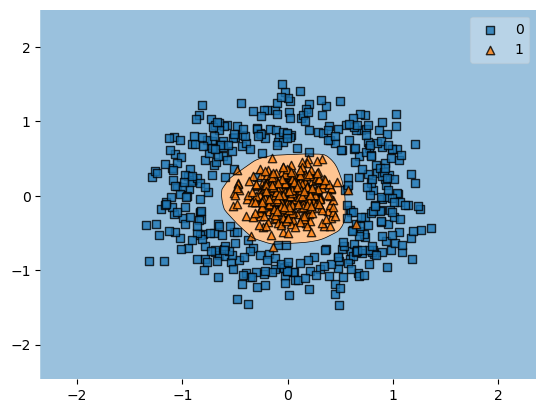

In [31]:
plot_decision_regions(X_train,y_train.ravel(),clf=model)

9600/9600 [==============================] - 10s 1ms/step


<Axes: >

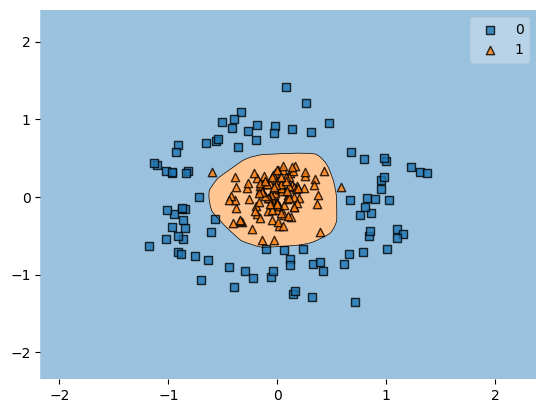

In [32]:
plot_decision_regions(X_test,y_test.ravel(),clf=model)